In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('mental_health_workplace_survey.csv')  # Remove header=None
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [10]:
import sklearn
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

Logistic Regression

In [14]:

trgt  = "BurnoutRisk"
cat_cols = ['Gender', 'JobRole', 'Department', 'RemoteWork','HasMentalHealthSupport','HasTherapyAccess','SalaryRange' ]
num_cols = df.drop(columns=cat_cols+ [trgt]).select_dtypes(include=['int64', 'float64']).columns.tolist()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the preprocessor
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), num_cols),
		('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
	]
)

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [20]:

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1500)
lda = LinearDiscriminantAnalysis()


lr.fit(X_train_p, Y_train)
lda.fit(X_train_p, Y_train)





LinearDiscriminantAnalysis()

In [24]:
predy = lr.predict(X_test_p)
proby = lr.predict_proba(X_test_p)[:, 1]
predy = lda.predict(X_test_p)
proby = lda.predict_proba(X_test_p)[:, 1]



In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
def eval(name, yt, ypred, prob):
    acc = accuracy_score(yt, ypred)
    cm = confusion_matrix(yt, ypred)
    auc = roc_auc_score(yt, ypred)
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"ROC-AUC: {auc:.3f}\n")
    return acc, cm, auc
eval_log = eval("Logistic Regression", Y_test, predy, proby)
eval_lda = eval("LDA", Y_test,predy, proby)






=== Logistic Regression ===
Accuracy: 0.947
Confusion Matrix:
[[367  32]
 [  0 201]]
ROC-AUC: 0.960

=== LDA ===
Accuracy: 0.947
Confusion Matrix:
[[367  32]
 [  0 201]]
ROC-AUC: 0.960



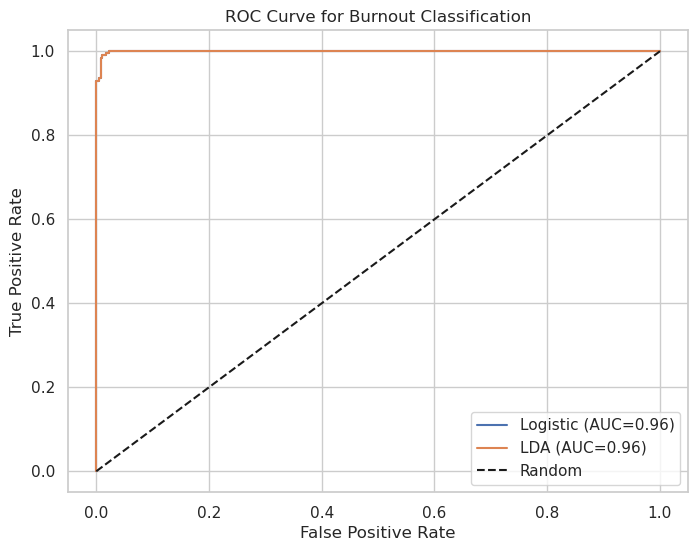

In [31]:
fpr_log, tpr_log, _ = roc_curve(Y_test, proby)
fpr_lda, tpr_lda, _ = roc_curve(Y_test, proby)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={eval_log[2]:.2f})")
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC={eval_lda[2]:.2f})")
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Burnout Classification")
plt.legend()
plt.grid(True)
plt.show()
